In [1]:
import requests
from io import BytesIO

def load_image_from_url(url=None):
    if(url is None):
        # URL de la imagen en línea
        url = "https://img.freepik.com/iconos-gratis/autobus_318-574563.jpg"

    # Descarga la imagen desde la URL
    response = requests.get(url)
    image_data = response.content
    # Crea un objeto Image desde los datos descargados
    image = Image.open(BytesIO(image_data))
    return image

def crop_image(image):
    # Corta 150 píxeles de la parte superior e inferior
    top_cut = 165
    bottom_cut = 165
    width, height = image.size
    cropped_image = image.crop((0, top_cut, width, height - bottom_cut))
    return cropped_image

def resize_image(image, target_width=None, target_height=None):
    """
    Ajusta el tamaño de la imagen mientras mantiene las proporciones.
    
    Args:
        image (PIL.Image.Image): La imagen a redimensionar.
        target_width (int, opcional): El ancho objetivo deseado.
        target_height (int, opcional): La altura objetivo deseada.
        
    Returns:
        PIL.Image.Image: La imagen redimensionada.
    """
    width, height = image.size
    aspect_ratio = width / height
    
    if target_width is None and target_height is None:
        raise ValueError("Debes proporcionar al menos una de las dimensiones objetivo.")
    
    if target_width is not None and target_height is None:
        new_width = target_width
        new_height = int(target_width / aspect_ratio)
    elif target_width is None and target_height is not None:
        new_width = int(target_height * aspect_ratio)
        new_height = target_height
    else:
        new_width = target_width
        new_height = target_height
    
    resized_image = image.resize((new_width, new_height))
    return resized_image

def load_draw_image():
    image = load_image_from_url()
    image = crop_image(image)
    image = resize_image(image, target_height=25)
    return image

In [2]:
from PIL import ImageDraw, ImageFont

def draw_rounded_rectangle_with_text(draw, position, width, height, text, font=None, fontsize=16, border_color=(0, 0, 0), background_color=(255, 255, 255), text_color=(0, 0, 0)):
    """
    Dibuja un rectángulo con bordes redondeados y un texto encima en un objeto ImageDraw.

    Args:
        draw (PIL.ImageDraw.ImageDraw): El objeto ImageDraw en el que se dibujará.
        position (tuple): Las coordenadas (x, y) de la esquina superior izquierda del rectángulo.
        width (int): El ancho del rectángulo.
        height (int): La altura del rectángulo.
        text (str): El texto a dibujar encima del rectángulo.
        font (PIL.ImageFont.ImageFont, opcional): La fuente a utilizar para el texto.
        border_color (tuple, opcional): El color del borde del rectángulo en formato RGB.
        background_color (tuple, opcional): El color de fondo del rectángulo en formato RGB.
        text_color (tuple, opcional): El color del texto en formato RGB.
    """
    corner_radius = 10
    border_width = 2
    
    x, y = position
    x2, y2 = x + width, y + height
    
    draw.rounded_rectangle(
        [(x + border_width, y + border_width), (x2 - border_width, y2 - border_width)],
        corner_radius,
        outline=border_color,
        width=border_width,
        fill=background_color
    )
    
    text_position = ((x + x2) // 2, (y + y2) // 2)
    
    if font is None:
        font = ImageFont.load_default()
    
    # text_size = font.getsize()
    # text_size = draw.textsize(text, font)

    txt_img = Image.new("RGBA", (width, height), (255,255,255,0))
    # font = ImageFont.truetype(font, fontsize)
    d = ImageDraw.Draw(txt_img)
    text_size = d.textsize(text, font=font)

    text_position = (text_position[0] - text_size[0] // 2, text_position[1] - text_size[1] // 2)
    
    draw.text(text_position, text, fill=text_color, font=font)


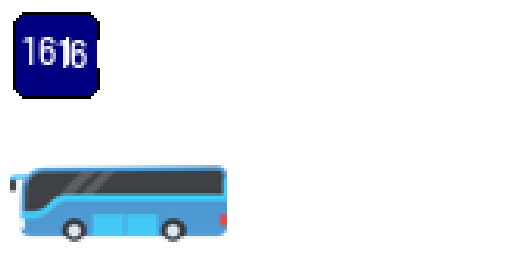

In [3]:
from PIL import Image, ImageDraw, ImageFont
import matplotlib.pyplot as plt
import numpy as np

# Crear una imagen en blanco con el tamaño especificado
width, height = 160, 80
background_color = (0, 0, 128)  # Azul marino
border_color = (0, 0, 0)  # Negro
text_color = (255, 255, 255)  # Blanco
corner_radius = 5

image = Image.new("RGB", (width, height), text_color)
draw = ImageDraw.Draw(image)

# Definir la información
linea_bus = "16 I"

def load_barlow(font_size=12):
    # Ruta a la fuente TTF personalizada
    font_path = "/app/data/Barlow-Medium.ttf"
    # Carga la fuente
    return ImageFont.truetype(font_path, font_size)

font = load_barlow()
# font = ImageFont.load_default()

# Dibujar el recuadro con esquinas redondeadas
border_width = 1
rect_width = 30
rect_width -= border_width
rect_height = 30
rect_height -= border_width

draw.rounded_rectangle(
    [(border_width, border_width), (rect_width - border_width, rect_height - border_width)],
    corner_radius,
    outline=border_color,
    width=border_width,
    fill=background_color
)
w, h = draw.im.size
# Dibujar la placa patente en el centro
text_width, text_height = draw.im.size
# .textsize(linea_bus, font=font)
text_position = (0.15*rect_width, 0.2*rect_height)

draw.text(text_position, linea_bus, fill=text_color, font=font)

# Poner el tiempo estimado de espera
text_position = (0.5*rect_width, 0.25*rect_height)
draw.text(text_position, linea_bus, fill=text_color, font=font)

# # Llamar a la función para dibujar un rectángulo con texto encima
# draw_rounded_rectangle_with_text(draw, (50, 50), 300, 100, "Texto de Prueba")

# Supongamos que tienes una función llamada load_draw_image() que devuelve la imagen que quieres agregar
loaded_image = load_draw_image()

# Crear una imagen en blanco del mismo tamaño que loaded_image con fondo blanco
white_background = Image.new("RGB", loaded_image.size, (255, 255, 255))

# Pega la loaded_image en la imagen en blanco
white_background.paste(loaded_image, (0, 0), loaded_image)

# Calcula la posición para agregar la imagen cargada
image_position = (0, 50)  # Cambia esto según tu diseño

# Agrega la imagen a la imagen creada
image.paste(white_background, image_position)

# Convertir la imagen de PIL a un array de numpy para matplotlib
image_array = np.array(image)

# Mostrar la imagen utilizando matplotlib
plt.imshow(image_array)
plt.axis("off")  # Ocultar ejes
plt.show()

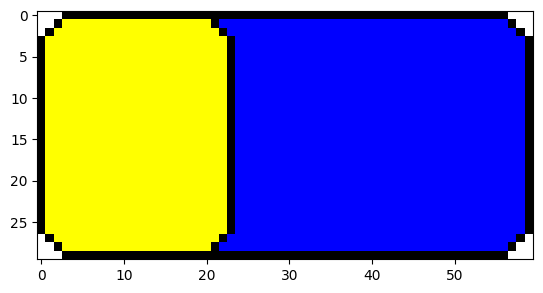

In [4]:
from PIL import Image, ImageDraw

def cartel_micro(h, w):
    image = Image.new("RGB", (w, h), "white")
    proportion = 0.4
    width_border = 1
    draw = ImageDraw.Draw(image)

    # Draw a rounded rectangle
    draw.rounded_rectangle((0, 0, w-width_border, h-width_border), fill="blue", outline="black",
                           width=width_border, radius=5)
    draw.rounded_rectangle((0, 0, proportion*w-width_border, h-width_border), fill="yellow", outline="black",
                           width=width_border, radius=5)
    return image
    
    
if __name__ == "__main__":
    plt.imshow(cartel_micro(30, 60))

(0, 6, 18, 20)
17.5


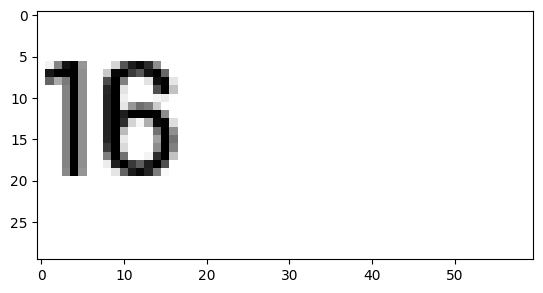

In [5]:
def load_barlow(font_size=12):
    # Ruta a la fuente TTF personalizada
    font_path = "/app/data/Barlow-Medium.ttf"
    # Carga la fuente
    return ImageFont.truetype(font_path, font_size)

def number_letter_bus(h, w):
    image = Image.new("RGB", (w, h), "white")
    linea_bus = "16"
    text_color = 'black'
    font = load_barlow(font_size=20)
    font_width = font.getlength(linea_bus)
    print(font.getbbox(linea_bus))
    print(font_width)
    font_width = np.round(font_width)
    offset_width = np.round(w/2)
    #- np.round(font_width/2)
    text_position = (offset_width, 0)

    draw = ImageDraw.Draw(image)
    draw.text(
        #text_position,
        (0,0),
        linea_bus,
        fill=text_color,
        font=font,
        align ="center"
    )
    return image

if __name__ == "__main__":
    plt.imshow(number_letter_bus(30, 60))

In [39]:
class MyDraw():
    def __init__(self, height, width):
        self.height = height
        self.width = width
        pass

    def save_image(self, filename):
        self.image.save(filename)
        pass

    def start_draw(self, background_color=None):
        if background_color is None:
            background_color = self.theme_params['background_color']

        self.image = Image.new("RGB", (self.width, self.height), background_color)
        self.draw = ImageDraw.Draw(self.image)
        pass

    def add_image(self, obj, position):
        image_to_add = obj.get_image()  # Obtiene la imagen del objeto pasado como argumento
        if image_to_add:
            self.image.paste(image_to_add, position)
        pass

    def get_draw(self):
        return self.draw
    
    def get_image(self):
        return self.image

    def set_params(self,params):
        self.prms = params
        pass

    def set_theme(self,mode='day'):
        if(mode=='day'):
            self.start_day_mode()
        else:
            self.start_night_mode()
        pass

    def start_day_mode(self):
        self.theme_params = {
            'background_color': 'white',
            'text_color': 'black',
            'poster_line_color': 'black',
        }
        pass

    def start_night_mode(self):
        self.theme_params = {
            'background_color': 'black',
            'text_color': 'white',
            'poster_line_color': 'gray',
        }
        pass
    
    def load_barlow(self, font_size=None):
        # Ruta a la fuente TTF personalizada
        font_path = "/app/data/Barlow-Medium.ttf"
        # Carga la fuente
        if font_size is None:
            self.font = ImageFont.truetype(font_path, self.prms['font_size'])
        else:
            self.font = ImageFont.truetype(font_path, font_size)
        pass

    def preview(self):
        plt.imshow(self.image)
        plt.axis('off')
        plt.show()

    def crop_image(self, top_cut, bottom_cut):
        width, height = self.image.size
        self.image = self.image.crop((0, top_cut, width, height - bottom_cut))
        pass

    def resize_image(self, target_width=None, target_height=None):
        """
        Ajusta el tamaño de la imagen mientras mantiene las proporciones.
        
        Args:
            image (PIL.Image.Image): La imagen a redimensionar.
            target_width (int, opcional): El ancho objetivo deseado.
            target_height (int, opcional): La altura objetivo deseada.
            
        Returns:
            PIL.Image.Image: La imagen redimensionada.
        """
        width, height = self.image.size
        aspect_ratio = width / height
        
        if target_width is None and target_height is None:
            raise ValueError("Debes proporcionar al menos una de las dimensiones objetivo.")
        
        if target_width is not None and target_height is None:
            new_width = target_width
            new_height = int(target_width / aspect_ratio)
        elif target_width is None and target_height is not None:
            new_width = int(target_height * aspect_ratio)
            new_height = target_height
        else:
            new_width = target_width
            new_height = target_height
        
        self.image = self.image.resize((new_width, new_height))
        pass
        
class BusPoster(MyDraw):

    def start_draw(self):
        return super().start_draw()

    def set_colors(self):
        width_border = self.prms['width_border']
        proportion = self.prms['proportion']
        fill_color_l = self.prms['letter_background_color']
        fill_color_n = self.prms['number_background_color']


        self.draw.rounded_rectangle(
            (0, 0, self.width-width_border, self.height-width_border),
            fill=fill_color_l,
            outline=self.theme_params['poster_line_color'],
            width=width_border,
            radius=5)
        
        self.draw.rounded_rectangle(
            (0, 0, proportion*self.width-width_border, self.height-width_border),
            fill=fill_color_n,
            outline=self.theme_params['poster_line_color'],
            width=width_border,
            radius=5)
        pass

    def set_bus_number(self, bus_number="11"):
        text_color = 'black'
        width_border = self.prms['width_border']
        text_bbox = self.font.getbbox(str(bus_number))
        font_width, font_height = text_bbox[2] - text_bbox[0], text_bbox[3] - text_bbox[1]
        offset_width = np.round((self.prms['proportion']*self.width-width_border)/2) - np.round(font_width/2)
        text_position = (offset_width,0)
        self.draw.text(
            text_position,
            bus_number,
            fill=text_color,
            font=self.font,
            # align ="center"
        )
        pass

    def set_bus_letter(self, bus_letter="E"):
        proportion = self.prms['proportion']
        width_border = self.prms['width_border']
        text_color = 'white'
        text_bbox = self.font.getbbox(str(bus_letter))
        font_width, font_height = text_bbox[2] - text_bbox[0], text_bbox[3] - text_bbox[1]
        offset_width = np.round((proportion*self.width-width_border)) + 0.75*np.round(font_width/2)
        text_position = (offset_width,0)
        self.draw.text(
            text_position,
            bus_letter,
            fill=text_color,
            font=self.font,
            # align ="center"
        )
        pass


def bus_number_letter_image():
    cartel = BusPoster(30, 60)
    # cartel.start_day_mode()
    cartel.start_night_mode()
    cartel.start_draw()

    params = {
        'proportion': 0.6,
        'width_border': 1,
        'font_size': 25,
        'number_background_color': 'yellow',
        'letter_background_color': 'blue',
    }

    cartel.set_params(params)
    cartel.load_barlow()
    cartel.set_colors()
    cartel.set_bus_number()
    cartel.set_bus_letter()
    return cartel.get_image()

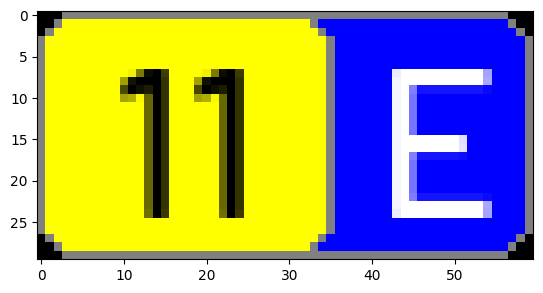

In [40]:
bus_poster = bus_number_letter_image()
plt.imshow(bus_poster)

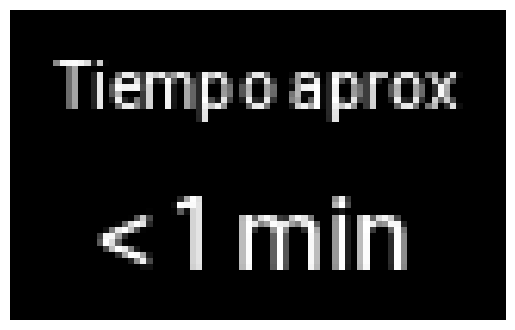

In [41]:
class TimeAnnouncement(MyDraw):

    def start_draw(self):
        super().start_draw()
        self.border = 1

    def set_background(self):
        self.draw.rounded_rectangle(
            (0, 0, self.width-0.5*self.border, self.height-0.5*self.border),
            fill="#dcdcdc",
            outline="gray",
            width=self.border,
            radius=1)
        pass

    def set_base_text(self):
        text = "Tiempo aprox"
        text_color = self.theme_params['text_color']
        self.load_barlow(font_size=11)
        text_bbox = self.font.getbbox(text)
        font_width, font_height = text_bbox[2] - text_bbox[0], text_bbox[3] - text_bbox[1]
        # print(font_width, font_height)
        offset_width = (np.round((self.width-self.border)) - np.round(font_width))/2
        text_position = (offset_width,5)
        # text_position = (0, 0)
        self.draw.text(
            text_position,
            text,
            fill=text_color,
            font=self.font,
            align ="center"
        )
        pass

    def set_min_max_text(self, min_time, max_time):

        text = "Tiempo aprox"
        text_color = self.theme_params['text_color']
        self.load_barlow(font_size=11)
        text_bbox = self.font.getbbox(text)
        base_font_width, base_font_height = text_bbox[2] - text_bbox[0], text_bbox[3] - text_bbox[1]

        if (int(max_time) <= 1):
            text = f"< 1 min"
        else:
            text = f'{min_time} a {max_time} min'
            
        self.load_barlow(font_size=18)
        text_bbox = self.font.getbbox(text)
        font_width, font_height = text_bbox[2] - text_bbox[0], text_bbox[3] - text_bbox[1]
        # print(font_width, font_height)
        offset_width = (np.round((self.width-self.border)) - np.round(font_width))/2
        offset_height = (np.round((self.height-self.border)) - np.round(base_font_height))/2
        text_position = (offset_width,5+offset_height)
        # text_position = (0, 0)
        self.draw.text(
            text_position,
            text,
            fill=text_color,
            font=self.font,
            align ="center"
        )

time_anmc = TimeAnnouncement(50, 80)
time_anmc.start_night_mode()
time_anmc.start_draw()
# time_anmc.set_background()
time_anmc.set_base_text()
time_anmc.set_min_max_text(min_time=0, max_time=1)
time_anmc.preview()

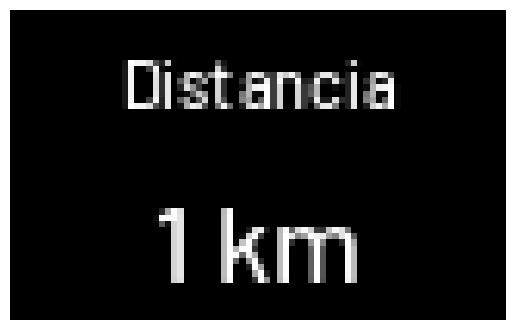

In [42]:
class DistanceAnnouncement(MyDraw):

    def start_draw(self):
        super().start_draw()
        self.border = 1

    def set_background(self):
        self.draw.rounded_rectangle(
            (0, 0, self.width-0.5*self.border, self.height-0.5*self.border),
            fill="#dcdcdc",
            outline="gray",
            width=self.border,
            radius=1)
        pass

    def set_base_text(self):
        text = "Distancia"
        text_color = self.theme_params['text_color']
        self.load_barlow(font_size=11)
        text_bbox = self.font.getbbox(text)
        font_width, font_height = text_bbox[2] - text_bbox[0], text_bbox[3] - text_bbox[1]
        # print(font_width, font_height)
        offset_width = (np.round((self.width-self.border)) - np.round(font_width))/2
        text_position = (offset_width,5)
        # text_position = (0, 0)
        self.draw.text(
            text_position,
            text,
            fill=text_color,
            font=self.font,
            align ="center"
        )
        pass

    def set_distance_text(self, distance):

        text = "Distancia"
        text_color = self.theme_params['text_color']
        self.load_barlow(font_size=11)
        text_bbox = self.font.getbbox(text)
        base_font_width, base_font_height = text_bbox[2] - text_bbox[0], text_bbox[3] - text_bbox[1]


        text = f'{distance} km'
        self.load_barlow(font_size=18)
        text_bbox = self.font.getbbox(text)
        font_width, font_height = text_bbox[2] - text_bbox[0], text_bbox[3] - text_bbox[1]
        # print(font_width, font_height)
        offset_width = (np.round((self.width-self.border)) - np.round(font_width))/2
        offset_height = (np.round((self.height-self.border)) - np.round(base_font_height))/2
        text_position = (offset_width,5+offset_height)
        # text_position = (0, 0)
        self.draw.text(
            text_position,
            text,
            fill=text_color,
            font=self.font,
            align ="center"
        )

dist_anmc = DistanceAnnouncement(50, 80)
dist_anmc.start_night_mode()
dist_anmc.start_draw()
dist_anmc.border = 0
# dist_anmc.set_background()
dist_anmc.set_base_text()
dist_anmc.set_distance_text(distance=1)
dist_anmc.preview()

In [43]:
import requests
import io
class BusPlate():
    def __init__(self, url=None) -> None:
        if url is None:
            self.url = "https://matriculasdelmundo.com/gRCH1.php"
        pass

    def set_url(self, url):
        self.url = url
        pass

    def get_image(self):
        if hasattr(self, 'image'):
            return self.image
        else:
            print("Error: No se ha generado ninguna imagen aún.")
            return None

    def request_bus_plate(self, bus_plate=None):
        if bus_plate is None:
            self.bus_plate = "AABB11"
        else:
            self.bus_plate = bus_plate

        params = {
            "textRCH1": self.bus_plate[0:2],
            "textRCH1A": self.bus_plate[2:4],
            "textRCH1B": self.bus_plate[4:],
            "textRCH1C": ""
        }

        self.response = requests.get(self.url, params=params)
        pass

    def save_bus_plate_image(self):
        if self.response.status_code == 200:
            filename = f"/app/data/output/plate_{self.bus_plate}.png" 
            with open(filename, "wb") as f:
                f.write(self.response.content)
            print(f"Imagen generada guardada como '{filename}'")
        else:
            print("Error al guardar la imagen generada")
        pass

    def generate_image(self):
        image_bytes = io.BytesIO(self.response.content)
        self.image = Image.open(image_bytes)
        self.image = self.image.convert("RGBA")  # Convertir a formato RGBA
        pass

    def resize_image(self, new_size):
        proportion = np.min([self.image.size[0]/new_size[0], self.image.size[1]/new_size[1]])
        nx, ny = int(np.round(image.size[0]/proportion)), int(np.round(image.size[1]/proportion))
        self.image = self.image.resize((nx, ny))
        pass

    def preview(self):
        plt.imshow(self.image)
        plt.axis('off')
        plt.show()
        pass

In [44]:
class BusImage(MyDraw):
    def __init__(self):
        pass
    
    def load_image_from_url(self, url=None):
        if(url is None):
            # URL de la imagen en línea
            url = "https://img.freepik.com/iconos-gratis/autobus_318-574563.jpg"

        # Descarga la imagen desde la URL
        response = requests.get(url)
        image_data = response.content
        # Crea un objeto Image desde los datos descargados
        self.image = Image.open(BytesIO(image_data))
        # Crear una imagen en blanco del mismo tamaño que loaded_image con fondo blanco
        background = Image.new("RGB", self.image.size, self.theme_params['background_color'])

        # Pega la loaded_image en la imagen en blanco
        background.paste(self.image, (0, 0), self.image)
        
        self.image = background

        # Calcula la posición para agregar la imagen cargada
        image_position = (0, 0)  # Cambia esto según tu diseño

        # Agrega la imagen a la imagen creada
        self.image.paste(background, image_position)
        pass

In [45]:
theme = 'night'

panel_height, panel_width = 40, 80
n_panels = 3
full_panel = MyDraw(n_panels*panel_height, n_panels*panel_width)
full_panel.set_theme(theme)
full_panel.start_draw()
# full_panel.preview()

bp = BusPlate()
plate = "WXYZ88"
bp.request_bus_plate(bus_plate=plate)
bp.generate_image()
bp.resize_image((40,80))

dist_anmc = DistanceAnnouncement(50, 80)
dist_anmc.set_theme(theme)
dist_anmc.start_draw()
# dist_anmc.set_background()
dist_anmc.set_base_text()
dist_anmc.set_distance_text(distance=5)

time_anmc = TimeAnnouncement(50, 80)
time_anmc.set_theme(theme)
time_anmc.start_draw()
# time_anmc.set_background()
time_anmc.set_base_text()
time_anmc.set_min_max_text(min_time=2, max_time=3)

poster = BusPoster(30, 60)
poster.set_theme(theme)
poster.start_draw()

poster_params = {
    'proportion': 0.6,
    'width_border': 1,
    'font_size': 25,
    'number_background_color': 'yellow',
    'letter_background_color': 'green',
}

poster.set_params(poster_params)
poster.load_barlow()
poster.set_colors()
poster.set_bus_number(bus_number="20")
poster.set_bus_letter(bus_letter="L")

bm = BusImage()
bm.set_theme(theme)
bm.load_image_from_url()
bm.crop_image(top_cut=165, bottom_cut=165)
bm.resize_image(target_width=80)

full_panel.add_image(bp, (120, 80))
full_panel.add_image(dist_anmc, (90, 10))
full_panel.add_image(time_anmc, (160, 10))
full_panel.add_image(poster, (40, 80))
full_panel.add_image(bm, (5,20))
full_panel.get_image()
full_panel.save_image('/app/data/output.png')